In [ ]:
import numpy as np
import pandas as pd
import os
import csv
#import cv2
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Input, Bidirectional, TimeDistributed, GRU, LSTM, BatchNormalization, ConvLSTM2D, Concatenate
from subprocess import call
import glob
import Automold as am
import Helpers as hp

In [ ]:
vc = cv2.VideoCapture('./data_comma/train.mp4')
# Read first frame
ret, first_frame = vc.read()

In [ ]:
ret is True

True

In [ ]:
# Don't need to run this when the optical flow is ready
try:
    if not os.path.exists('./data_comma/optical_flow_frames'):
        os.makedirs('./data_comma/optical_flow_frames')
except OSError:
    print('Where is the data directory?')
counter = 0
# Get a VideoCapture object from video and store it in vs
vc = cv2.VideoCapture('./data_comma/train.mp4')
# Read first frame
ret, first_frame = vc.read()
# Scale and resize image
resize_dim = 600
max_dim = max(first_frame.shape)
scale = resize_dim/max_dim
first_frame = cv2.resize(first_frame, None, fx=scale, fy=scale)
# Convert to gray scale 
prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)


# Create mask
mask = np.zeros_like(first_frame)
# Sets image saturation to maximum
mask[..., 1] = 255


out = cv2.VideoWriter('Optical.mp4',-1,1,(600, 600))

while(1):
    # Read a frame from video
    ret, frame = vc.read()
    
    # Convert new frame format`s to gray scale and resize gray frame obtained
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, None, fx=scale, fy=scale)

    # Calculate dense optical flow by Farneback method
    # https://docs.opencv.org/3.0-beta/modules/video/doc/motion_analysis_and_object_tracking.html#calcopticalflowfarneback
    flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, pyr_scale = 0.5, levels = 3, winsize = 15, iterations = 5, poly_n = 5, poly_sigma = 1.2, flags = 0)
    #flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, pyr_scale = 0.5, levels = 5, winsize = 11, iterations = 5, poly_n = 5, poly_sigma = 1.1, flags = 0)
    # Compute the magnitude and angle of the 2D vectors
    magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    # Set image hue according to the optical flow direction
    mask[..., 0] = angle * 180 / np.pi / 2
    # Set image value according to the optical flow magnitude (normalized)
    mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    # Convert HSV to RGB (BGR) color representation
    rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)
    
    # Resize frame size to match dimensions
    frame = cv2.resize(frame, None, fx=scale, fy=scale)
    
    # Open a new window and displays the output frame
    dense_flow = cv2.addWeighted(frame, 1,rgb, 2, 0)
    cv2.imshow("Dense optical flow", dense_flow)
    out.write(dense_flow)
    # Update previous frame
    prev_gray = gray
    # Frame are read by intervals of 1 millisecond. The programs breaks out of the while loop when the user presses the 'q' key
    if cv2.waitKey(10) & 0xFF == ord('q') or ret is False:
        break
    else:
        name = './data_comma/optical_flow_frames/Frame' + str(counter) + '.jpg'
        cv2.imwrite(name, dense_flow)
        #train_label.write(label_id[counter])
        counter += 1
# The following frees up resources and closes all windows
vc.release()

cv2.destroyAllWindows()

error: OpenCV(3.4.2) c:\miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\imgproc\src\color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'cv::CvtHelper<struct cv::Set<3,4,-1>,struct cv::Set<1,-1,-1>,struct cv::Set<0,2,5>,2>::CvtHelper'


In [ ]:
## Don't need to run this if frames have been extracted
video_file = 'train'

video_id = './data_comma/' + video_file + '.mp4'
label_id = './data_comma/' + video_file + '.txt'

try:
    if not os.path.exists('./data_comma/data_frames'):
        os.makedirs('./data_comma/data_frames')
except OSError:
    print('Where is the data directory?')

video_reader = cv2.VideoCapture(video_id)
#train_label = open('./data_comma/labels.txt', 'w')

counter = 0

while(True):
    ret, frame = video_reader.read()

    if ret:
        name = './data_comma/data_frames/Frame' + str(counter) + '.jpg'
        cv2.imwrite(name, frame)
        #train_label.write(label_id[counter])
        counter += 1
    else:
        break
        
video_reader.release()
train_label.close()

KeyboardInterrupt: 

In [ ]:
"""
frame_dir = './data_comma/optical_flow_frames'
label_dir = './data_comma/train.txt'
labels_file = './data_comma/OpticalData.csv'
"""

frame_dir = '/Users/cee-zqing3/data_comma/data_frames'
labels_file = '/Users/cee-zqing3/data_comma/data.csv'

def load_data(labels_file, test_size):
    """
    Display a list of images in a single figure with matplotlib.
        Parameters:
            labels_file: The labels CSV file.
            test_size: The size of the testing set.
    """
    labels = pd.read_csv(labels_file)
    X = labels['VideoFrames'].values
    y = labels['Speeds'].values
    X_train, X_test, y_train, y_test = train_test_split(X[0:-1], y[0:-1], test_size=test_size, random_state=0)

    return X_train, X_test, y_train, y_test

def load_image(data_dir, image_file): #把frame转化成 matrix
    """
    Load RGB image.
        Parameters:
            data_dir: The directory where the images are.
            image_file: The image file name.
    """
    return mpimg.imread(os.path.join(data_dir, image_file.strip()))


data = load_data(labels_file, 0.1)

In [ ]:

labels = pd.read_csv(labels_file)
y = labels['Speeds'].values
X = labels['VideoFrames'].values
a = y[0:-1]
a.shape

(20399,)

In [ ]:
frame_dir = './data_comma/data_frames'
label_dir = './data_comma/train.txt'
labels_file = './data_comma/Data.csv'

def load_data(labels_file, test_size):
    """
    Display a list of images in a single figure with matplotlib.
        Parameters:
            labels_file: The labels CSV file.
            test_size: The size of the testing set.
    """
    labels = pd.read_csv(labels_file)
    X = labels['VideoFrames'].values
    y = labels['Speeds'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)

    return X_train, X_test, y_train, y_test

def load_image(data_dir, image_file):
    """
    Load RGB image.
        Parameters:
            data_dir: The directory where the images are.
            image_file: The image file name.
    """
    return mpimg.imread(os.path.join(data_dir, image_file.strip()))


data = load_data(labels_file, 0.1)

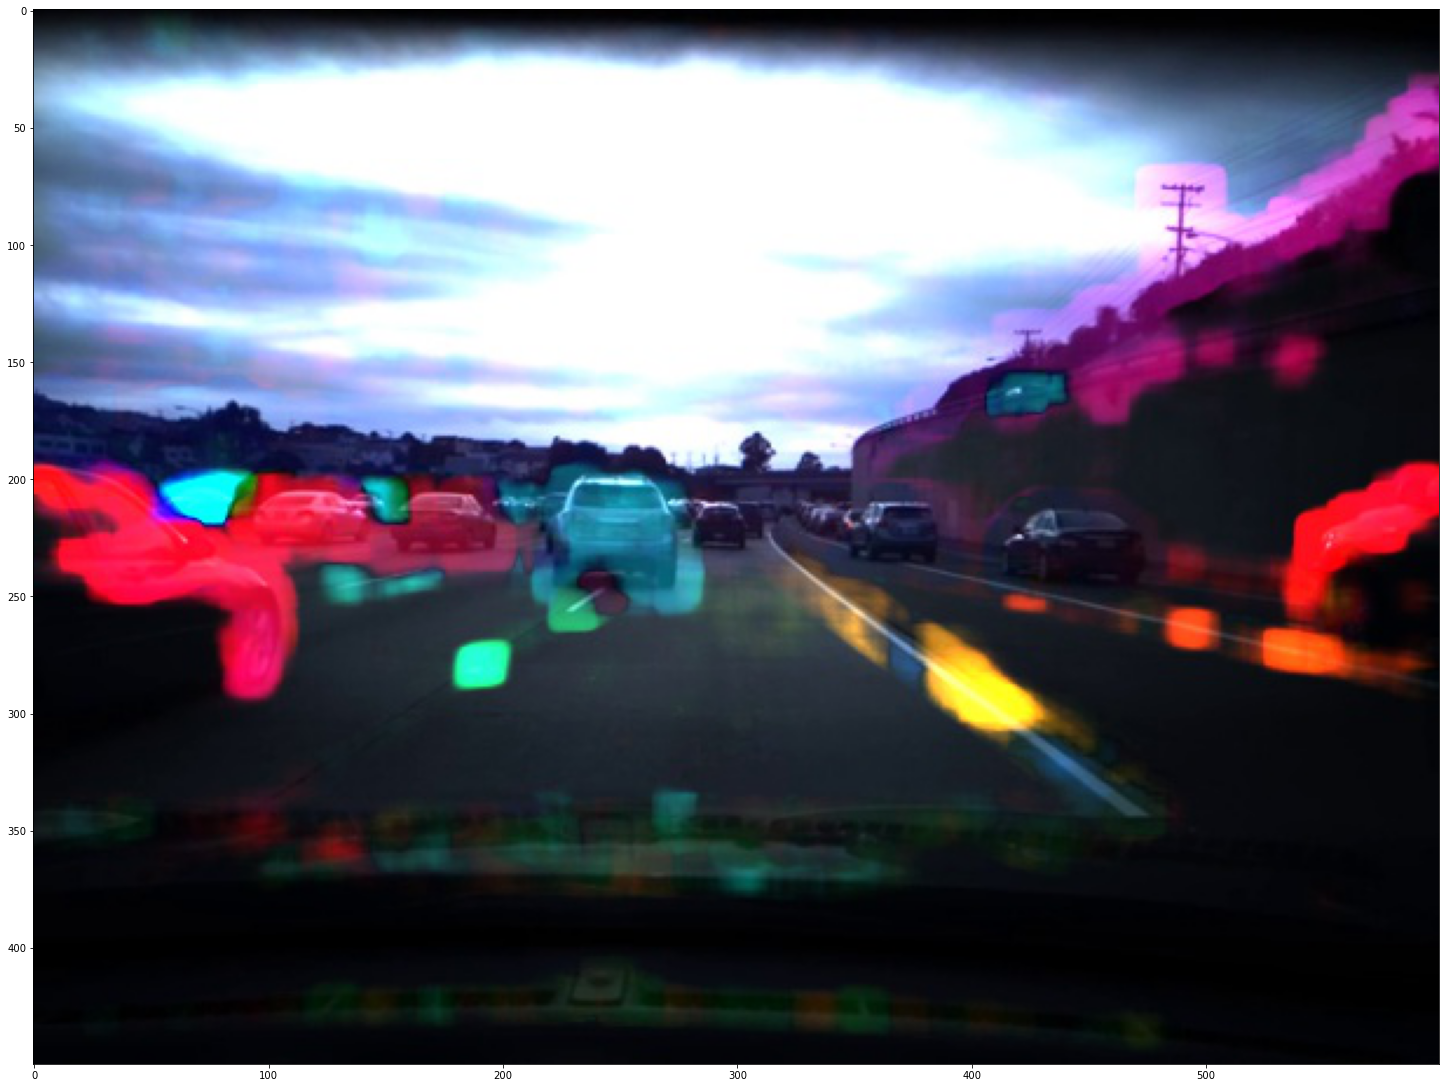

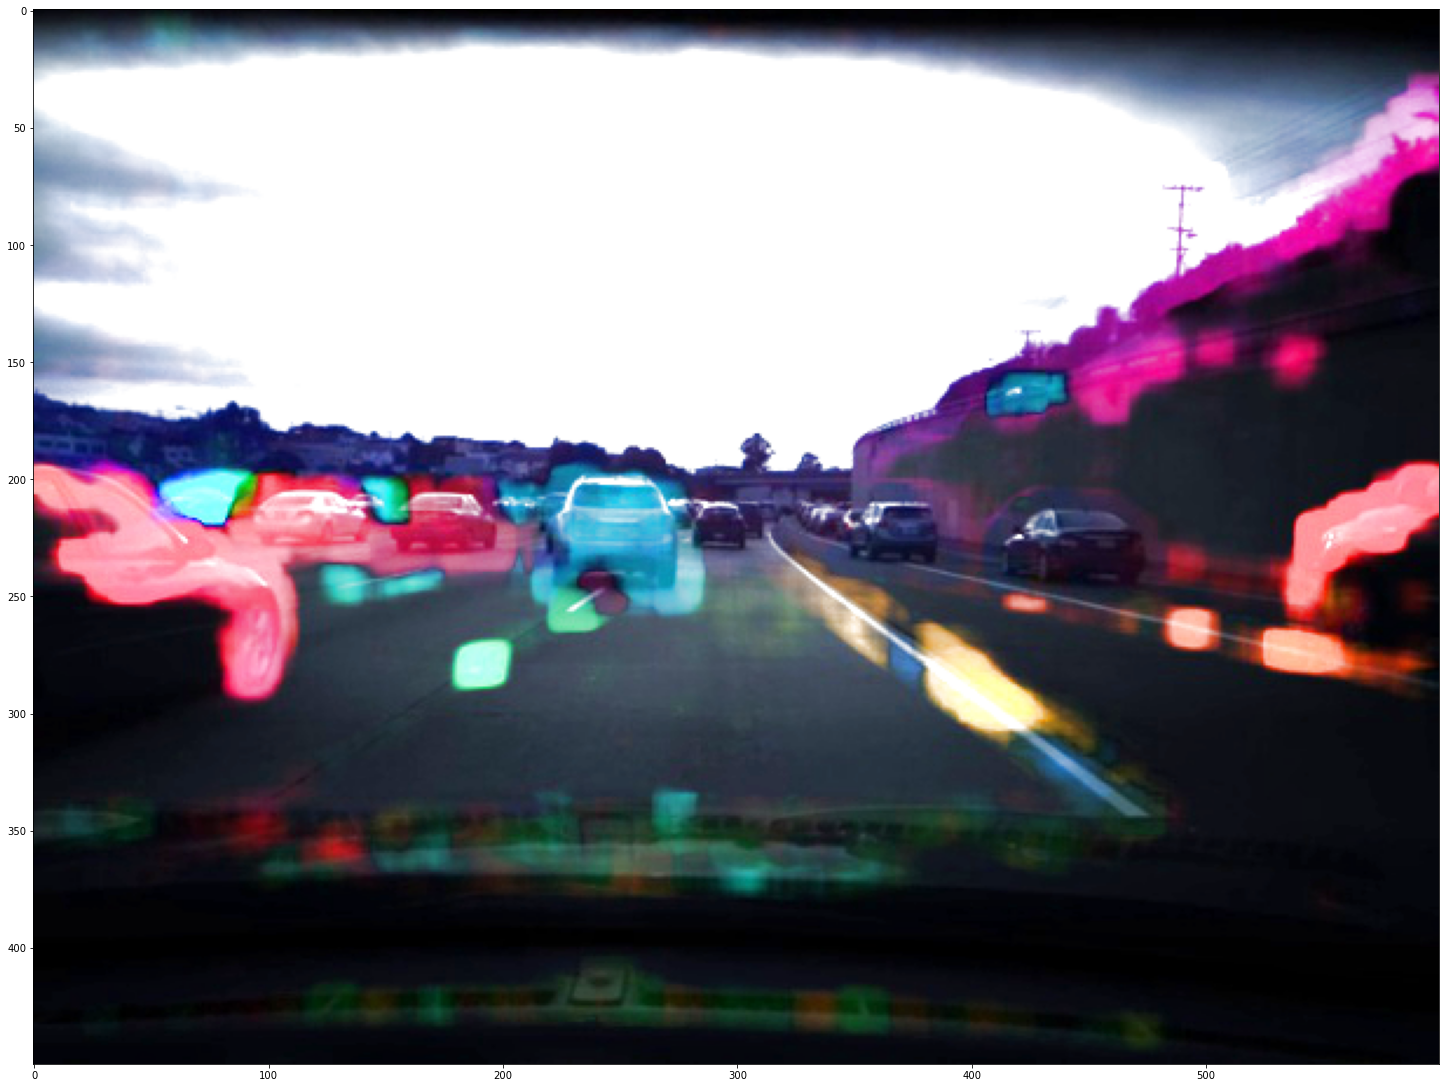

In [ ]:
image = load_image(frame_dir, str(data[0][16]))
b_image= am.brighten(image, 0.5) #增加robustness
hp.visualize(image)
hp.visualize(b_image)

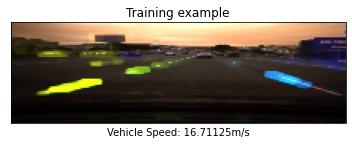

In [ ]:
image = load_image(frame_dir, str(data[0][6]))
def display(image, angle, label):
    plt.imshow(image)
    plt.xlabel("Vehicle Speed: {:.5f}".format(angle)+"m/s")
    plt.title(label)
    plt.xticks([])
    plt.yticks([])
    plt.show()

veh_speed = data[2][6]
display(preprocess(image), veh_speed, "Training example")

In [ ]:
def random_flip(data_dir, image_file, speed):
    """
    Randomly flipping the input image horizontaly, with steering angle adjustment.
        Parameters:
            image: The input image.
            steering_angle: The steering angle related to the input image.
    """
    image = load_image(data_dir, image_file)
    if np.random.rand() < 0.5:
        image = cv2.flip(image, 1)
        speed = speed
    return image, speed

def random_shift(image, speed, range_x, range_y):
    """
    Shifting (Translating) the input images, with steering angle adjustment.
        Parameters:
            image: The input image.
            steering_angle: The steering angle related to the input image.
            range_x: Horizontal translation range.
            range_y: Vertival translation range.
    """
    trans_x = range_x * (np.random.rand() - 0.5)
    trans_y = range_y * (np.random.rand() - 0.5)
    speed += trans_x * 0.002
    trans_m = np.float32([[1, 0, trans_x], [0, 1, trans_y]])
    height, width = image.shape[:2]
    image = cv2.warpAffine(image, trans_m, (width, height))
    return image, speed

def random_shadow(image):
    """
    Adding shadow to the input image.
        Parameters:
            image: The input image.
    """
    bright_factor = 0.75
    x = random.randint(0, image.shape[1])
    y = random.randint(0, image.shape[0])
    width = random.randint(image.shape[1], image.shape[1])
    if(x + width > image.shape[1]):
        x = image.shape[1] - x
    height = random.randint(image.shape[0], image.shape[0])
    if(y + height > image.shape[0]):
        y = image.shape[0] - y
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    image[y:y+height,x:x+width,2] = image[y:y+height,x:x+width,2]*bright_factor
    return cv2.cvtColor(image, cv2.COLOR_HSV2RGB)

def random_brightness(image):
    """
    Altering the brightness of the input image.
        Parameters:
            image: The input image.
    """
    # HSV (Hue, Saturation, Value) is also called HSB ('B' for Brightness).
    image= am.brighten(image, 0.56)
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    #ratio = 1.3 + (np.random.rand() - 0.05)
    ratio = 1.03
    hsv[:,:,2] =  hsv[:,:,2] * ratio
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

def augument(data_dir, image_file, speed, range_x=100, range_y=10): 
    """
    Generate an augumented image and adjust the associated steering angle.
        Parameters:
            data_dir: The directory where the images are.
            center: Center image.
            left: Left image.
            right: Right image
            steering_angle: The steering angle related to the input frame.
            range_x (Default = 100): Horizontal translation range.
            range_y (Default = 10): Vertival translation range.
    """
    image, speed = random_flip(data_dir, image_file, speed)
    image, speed = random_shift(image, speed, range_x, range_y)
    image = random_shadow(image)
    image = random_brightness(image)
    return image, speed

def preprocess(img): #
    """
    Preprocessing (Crop - Resize - Convert to YUV) the input image.
        Parameters:
            img: The input image to be preprocessed.
    """
    # Cropping the image #剪掉不必要的部分
    img = img[100:440, :-90, :]
    # Resizing the image
    img = cv2.resize(img, (IMAGE_WIDTH, IMAGE_HEIGHT), cv2.INTER_AREA)
    # Converting the image to YUV. # from RGB to 
    #img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #img =cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return img

batch_size, time_step = 68, 1
IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS = 66, 220, 3
INPUT_SHAPE = (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)
INPUT_SHAPE1 = (time_step, IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)
INPUT_SHAPE2 = (time_step,)

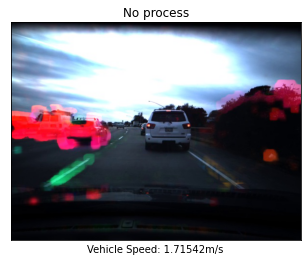

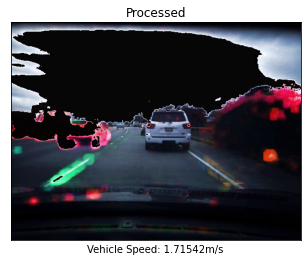

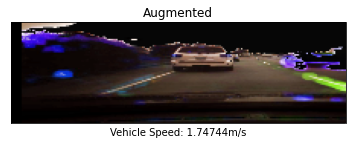

In [ ]:
image = load_image(frame_dir, str(data[0][1156]))
speed = data[2][1156]
label = "No process"
display(image, speed, label)

image1 = random_brightness(image)
label = "Processed"
display(image1, speed, label)

image2, veh_speed = augument(frame_dir, str(data[0][1156]), data[2][1156])
image2 = preprocess(image2)
label = "Augmented"
display(image2, veh_speed, label)

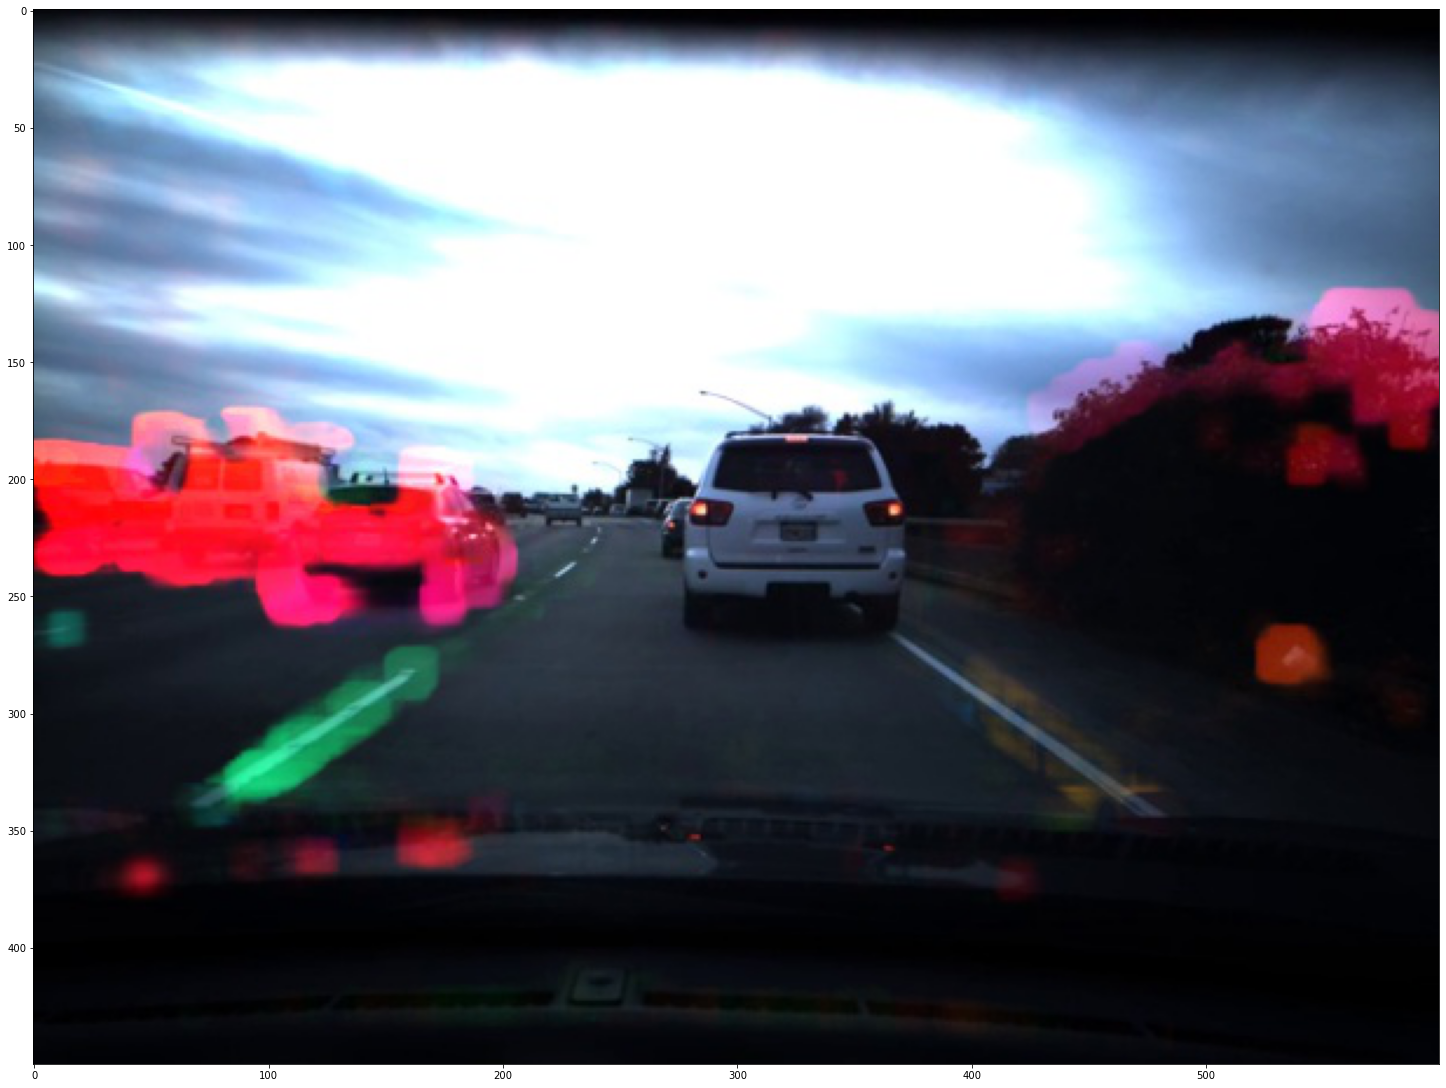

In [ ]:
hp.visualize(image)

In [ ]:
def N2N_model1():
    data = Input(shape=INPUT_SHAPE1)
    convs = Sequential()
    convs.add(Lambda(lambda x: x/127.5-1.0, input_shape=INPUT_SHAPE))
    convs.add(Conv2D(24, (5, 5), activation='relu', padding = 'same', strides=(2, 2)))
    convs.add(Conv2D(48, (5, 5), activation='relu', padding = 'same', strides=(2, 2)))
    convs.add(Conv2D(48, (5, 5), activation='relu', padding = 'same', strides=(2, 2)))
    convs.add(Dropout(0.5))
    convs.add(Conv2D(64, (3, 3), activation='relu', padding = 'same'))
    convs.add(Conv2D(64, (3, 3), activation='relu', padding = 'same'))
    #convs.add(MaxPooling2D((3, 3), strides=(1,1), padding='same'))
    #convs.add(GlobalAveragePooling2D())
    convs.add(Flatten())
    convs.add(Dropout(0.5))
    
    recu = TimeDistributed(convs)(data)
    recu = Bidirectional(GRU(206, activation='relu', recurrent_activation='hard_sigmoid', return_sequences=False))(recu)
    recu = Dropout(0.5)(recu)
    recu = Dense(128, activation='relu')(recu)
    recu = Dropout(0.5)(recu)
    recu = Dense(65, activation='relu')(recu)
    recu = Dropout(0.3)(recu)
    recu = Dense(10, activation='relu')(recu)
    #recu = Dropout(0.1)(recu)
    recu = Dense(1)(recu)

    model = Model(inputs=data, outputs=recu)
    model.summary()
    return model

def N2N_model1_1():
    data = Input(shape=INPUT_SHAPE1)
    convs = Sequential()
    convs.add(Lambda(lambda x: x/127.5-1.0, input_shape=INPUT_SHAPE))
    convs.add(Conv2D(24, (5, 5), activation='relu', padding = 'same', strides=(2, 2)))
    convs.add(Conv2D(48, (5, 5), activation='relu', padding = 'same', strides=(2, 2)))
    convs.add(Conv2D(48, (5, 5), activation='relu', padding = 'same', strides=(2, 2)))
    convs.add(Dropout(0.5))
    convs.add(Conv2D(64, (3, 3), activation='relu', padding = 'same'))
    convs.add(Conv2D(64, (3, 3), activation='relu', padding = 'same'))
    #convs.add(MaxPooling2D((3, 3), strides=(1,1), padding='same'))
    #convs.add(GlobalAveragePooling2D())
    convs.add(Flatten())
    convs.add(Dropout(0.5))
    
    recu = TimeDistributed(convs)(data)
    recu = Bidirectional(GRU(206, activation='relu', recurrent_activation='hard_sigmoid', return_sequences=False))(recu)
    recu = Dropout(0.5)(recu)
    
    inp2 = Input(shape=INPUT_SHAPE2)
    Conn = (Dense(40, activation='relu'))(inp2)
    
    recu1 = Concatenate()([recu, Conn])
    recu1 = Dropout(0.5)(recu1)
    recu1 = Dense(128, activation='relu')(recu1)
    recu1 = Dropout(0.5)(recu1)
    recu1 = Dense(65, activation='relu')(recu1)
    recu1 = Dropout(0.3)(recu1)
    recu1 = Dense(10, activation='relu')(recu1)
    #recu1 = Dropout(0.1)(recu1)
    recu1 = Dense(1)(recu1)

    model = Model(inputs=[data, inp2], outputs=recu1)
    model.summary()
    return model

In [ ]:
# This is hard to train
def N2N_model2():
    model = Sequential()
    #model.add(Lambda(lambda x: x/127.5-1.0, input_shape=INPUT_SHAPE1))
    model.add(BatchNormalization(input_shape=INPUT_SHAPE1))
    #model.add(ConvLSTM2D(filters=36, kernel_size=(5,5), padding = 'same', return_sequences = True, strides=(2, 2)))
    #model.add(ConvLSTM2D(filters=24, kernel_size=(5,5), padding = 'same', return_sequences = True, strides=(2, 2)))
    model.add(ConvLSTM2D(filters=36, kernel_size=(5,5), padding = 'same', return_sequences = True, strides=(2, 2)))
    #model.add(Dropout(0.2))
    #model.add(ConvLSTM2D(filters=48, kernel_size=(3,3), padding = 'same', return_sequences = True))
    model.add(ConvLSTM2D(filters=64, kernel_size=(3,3), padding = 'same'))
    
    model.add(Flatten())
    #.add(Dense(100, activation='relu'))
    model.add(Dense(50, activation='relu'))
    #model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    model.summary()
    return model

def N2N_model3():
    inp1 = Input(shape=INPUT_SHAPE1)
    Conv = (Lambda(lambda x: x/127.5-1.0))(inp1)
    Conv = (ConvLSTM2D(filters=24, kernel_size=(5,5), padding = 'same', return_sequences = True, strides=(2, 2)))(Conv)
    Conv = (ConvLSTM2D(filters=36, kernel_size=(3,3), padding = 'same', return_sequences = True, strides=(2, 2)))(Conv)
    Conv = (ConvLSTM2D(filters=64, kernel_size=(3,3), padding = 'same'))(Conv)
    Conv = Flatten()(Conv)
    Conv = (Dense(50, activation='relu'))(Conv)
    
    inp2 = Input(shape=INPUT_SHAPE2)
    Conn = (Dense(50, activation='relu'))(inp2)
    
    Merge = Concatenate()([Conv, Conn])
    Merge = Dropout(0.3)(Merge)
    Merge = Dense(64, activation='relu')(Merge)
    Merge = Dropout(0.3)(Merge)
    Merge = Dense(20, activation='relu')(Merge)
    Merge = Dense(1)(Merge)
    
    model = Model(inputs=[inp1, inp2], outputs=Merge)
    return model

In [ ]:
# This is hard to train
def N2N_model4():
    model = Sequential()
    model.add(Lambda(lambda x: x/127.5-1.0, input_shape=INPUT_SHAPE1))
    #model.add(BatchNormalization(input_shape=INPUT_SHAPE1))
    model.add(ConvLSTM2D(filters=36, kernel_size=(5,5), padding = 'same', return_sequences = True, strides=(2, 2)))
    model.add(ConvLSTM2D(filters=48, kernel_size=(5,5), padding = 'same', return_sequences = True, strides=(2, 2)))
    #model.add(ConvLSTM2D(filters=36, kernel_size=(3,3), padding = 'same', return_sequences = True, strides=(2, 2)))
    model.add(Dropout(0.3))
    model.add(ConvLSTM2D(filters=64, kernel_size=(3,3), padding = 'same', return_sequences = True))
    model.add(ConvLSTM2D(filters=96, kernel_size=(3,3), padding = 'same'))

    
    model.add(Flatten())
    model.add(Dropout(0.3))
    #model.add(Dense(100, activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(1))
    model.summary()
    return model

def N2N_model5():
    model = Sequential()
    model.add(Lambda(lambda x: x/127.5-1.0, input_shape=INPUT_SHAPE1))
    #model.add(BatchNormalization(input_shape=INPUT_SHAPE1))
    model.add(ConvLSTM2D(filters=36, kernel_size=(5,5), padding = 'same', return_sequences = True, strides=(2, 2)))
    model.add(ConvLSTM2D(filters=48, kernel_size=(5,5), padding = 'same', return_sequences = True, strides=(2, 2)))
    model.add(ConvLSTM2D(filters=64, kernel_size=(3,3), padding = 'same', return_sequences = True, strides=(2, 2)))
    model.add(Dropout(0.5))
    model.add(ConvLSTM2D(filters=64, kernel_size=(3,3), padding = 'same', return_sequences = True))
    model.add(ConvLSTM2D(filters=96, kernel_size=(3,3), padding = 'same'))

    
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    model.summary()
    return model

In [ ]:
def N2N_model3_1():
    inp1 = Input(shape=INPUT_SHAPE1)
    Conv = (Lambda(lambda x: x/127.5-1.0))(inp1)
    Conv = (ConvLSTM2D(filters=24, kernel_size=(5,5), padding = 'same', return_sequences = True, strides=(2, 2)))(Conv)
    Conv = (ConvLSTM2D(filters=36, kernel_size=(5,5), padding = 'same', return_sequences = True, strides=(2, 2)))(Conv)
    Conv = (Dropout(0.5))(Conv)
    Conv = (ConvLSTM2D(filters=64, kernel_size=(3,3), return_sequences = True, padding = 'same'))(Conv)
    Conv = (ConvLSTM2D(filters=96, kernel_size=(3,3), padding = 'same'))(Conv)
    Conv = Flatten()(Conv)
    Conv = (Dense(50, activation='relu'))(Conv)
    
    inp2 = Input(shape=INPUT_SHAPE2)
    Conn = (Dense(50, activation='relu'))(inp2)
    
    Merge = Concatenate()([Conv, Conn])
    Merge = Dropout(0.3)(Merge)
    Merge = Dense(64, activation='relu')(Merge)
    Merge = Dropout(0.3)(Merge)
    Merge = Dense(20, activation='relu')(Merge)
    Merge = Dense(1)(Merge)
    
    model = Model(inputs=[inp1, inp2], outputs=Merge)
    return model

In [ ]:
samples_per_epoch = 2200
nb_epoch = 15

def batcher(data_dir, image_paths, speeds, batch_size, training_flag):
    """
    Generate a training image given image paths and the associated steering angles
        Parameters:
            data_dir: The directory where the images are.
            image_paths: Paths to the input images.
            steering_angle: The steering angle related to the input frame.
            batch_size: The batch size used to train the model.
            training_flag: A flag to determine whether we're in training or validation mode.
    """
    images = np.empty([batch_size, time_step, IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS])
    veh_speeds = np.empty(batch_size)
    while True:
        i = 0
        for j in np.random.permutation(np.linspace(time_step, image_paths.shape[0], image_paths.shape[0]-time_step+1, dtype=int)): #随机选一个时间
            idx_X = np.linspace(j-time_step,j-1,time_step, dtype = int)
            for index in range(0,idx_X.shape[0]): # 提取一部分  
                ii = idx_X[index]
                image = image_paths[ii]
                veh_speed = speeds[ii]
                if training_flag and np.random.rand() < 0.65:
                    image, veh_speed = augument(data_dir, image, veh_speed)
                else:
                    image = load_image(data_dir, image)
                images[i,index,:] = preprocess(image)
            veh_speeds[i] = veh_speed
            i += 1
            if i == batch_size:
                break
        yield images, veh_speeds

def batcher1(data_dir, image_paths, speeds, batch_size, training_flag):
    """
    Generate a training image given image paths and the associated steering angles
        Parameters:
            data_dir: The directory where the images are.
            image_paths: Paths to the input images.
            steering_angle: The steering angle related to the input frame.
            batch_size: The batch size used to train the model.
            training_flag: A flag to determine whether we're in training or validation mode.
    """
    images = np.empty([batch_size, time_step, IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS])
    v_pre = np.empty([batch_size, time_step])
    veh_speeds = np.empty(batch_size)
    while True:
        i = 0
        for j in np.random.permutation(np.linspace(time_step, image_paths.shape[0], image_paths.shape[0]-time_step+1, dtype=int)):
            idx_X = np.linspace(j-time_step,j-1,time_step, dtype = int)
            for index in range(0,idx_X.shape[0]):
                ii = idx_X[index]
                image = image_paths[ii]
                veh_speed = speeds[ii]
                if training_flag and np.random.rand() < 0.68:
                    image, veh_speed = augument(data_dir, image, veh_speed)
                else:
                    image = load_image(data_dir, image)
                images[i,index,:] = preprocess(image)
                if index==0:
                    v_pre[i,index] = veh_speed
                else:
                    v_pre[i,index] = speeds[idx_X[index-1]]
            veh_speeds[i] = veh_speed
            #temp = veh_speeds[i]
            i += 1
            if i == batch_size:
                break
        yield [images, v_pre], veh_speeds
        
def train_model(model, X_train, X_valid, y_train, y_valid):
    checkpoint = ModelCheckpoint('model-{val_loss:03f}.h5',
                                 monitor='val_loss',
                                 verbose=1,
                                 save_best_only=True,
                                 mode='auto')
    model.compile(loss='mse', optimizer=Adam(lr=1.07e-4,beta_1=0.9, beta_2=0.999, decay=0., amsgrad=False))
    history = model.fit_generator(batcher(frame_dir, X_train, y_train, batch_size, True),
                        #steps_per_epoch = len(X_train)//batch_size,
                        samples_per_epoch,
                        epochs = nb_epoch,
                        max_queue_size=1,
                        validation_data=batcher(frame_dir, X_valid, y_valid, batch_size, False),
                        #nb_val_samples=len(X_valid),
                        validation_steps=len(X_valid)//(len(X_train)//samples_per_epoch),
                        use_multiprocessing = False,
                        callbacks=[checkpoint],
                        verbose=1)
    return history      
        
        
def train_model1(model, X_train, X_valid, y_train, y_valid):
    '''
        checkpoint = ModelCheckpoint('model-{val_loss:03f}.h5',
                                 monitor='val_loss',
                                 verbose=0,
                                 save_best_only=True,
                                 mode='auto')
    '''

    model.compile(loss='mse', optimizer=Adam(lr=1.07e-4,beta_1=0.9, beta_2=0.999, decay=0., amsgrad=False))
    history = model.fit_generator(batcher1(frame_dir, X_train, y_train, batch_size, True),
                        #steps_per_epoch = len(X_train)//batch_size,
                        samples_per_epoch,
                        epochs = nb_epoch,
                        max_queue_size=1,
                        validation_data=batcher1(frame_dir, X_valid, y_valid, batch_size, False),
                        #nb_val_samples=len(X_valid),
                        validation_steps=len(X_valid)//batch_size,
                        use_multiprocessing = False,
                        #callbacks=[checkpoint],
                        verbose=1)
    return history

In [ ]:
model0824 = N2N_model3()
history0824 = train_model(model0824, *data)
model0824.save('N2Ncomma0824.h5')

model0824 = N2N_model3()
history0824 = train_model(model0824, *data)
model0824.save('N2Ncomma0824.h5')

model0824 = N2N_model3()
history0824 = train_model(model0824, *data)
model0824.save('N2Ncomma0824.h5')

In [ ]:
#model92 = N2N_model1()
#history92 = train_model(model92, *data)
#model92.save('N2Ncomma92.h5')

model92_1 = N2N_model1_1()
history92_1 = train_model1(model92_1, *data)
model92_1.save('N2Ncomma92_1.h5')

Model: "model_24"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_37 (InputLayer)           (None, 1, 66, 220, 3 0                                            
__________________________________________________________________________________________________
time_distributed_22 (TimeDistri (None, 1, 16128)     152960      input_37[0][0]                   
__________________________________________________________________________________________________
bidirectional_22 (Bidirectional (None, 412)          20190060    time_distributed_22[0][0]        
__________________________________________________________________________________________________
input_38 (InputLayer)           (None, 1)            0                                            
___________________________________________________________________________________________

In [ ]:
model91 = N2N_model1()
history91 = train_model(model91, *data)
model91.save('N2Ncomma91.h5')

model91_1 = N2N_model1_1()
history91_1 = train_model1(model91_1, *data)
model91_1.save('N2Ncomma91_1.h5')

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_21 (InputLayer)           (None, 1, 66, 220, 3 0                                            
__________________________________________________________________________________________________
time_distributed_12 (TimeDistri (None, 1, 16128)     152960      input_21[0][0]                   
__________________________________________________________________________________________________
bidirectional_12 (Bidirectional (None, 460)          22575420    time_distributed_12[0][0]        
__________________________________________________________________________________________________
input_22 (InputLayer)           (None, 1)            0                                            
___________________________________________________________________________________________

In [ ]:
def getTestData(data_dir, image_paths, speeds, t_size, time_step, start):
    images = np.empty([t_size, time_step, IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS])
    veh_speeds = np.empty(t_size)
    i, i_start = 0, start
    for j in np.linspace(time_step, image_paths.shape[0], image_paths.shape[0]-time_step+1, dtype=int):
        idx_X = np.linspace(j-time_step,j-1,time_step, dtype = int)
        for index in range(0,idx_X.shape[0]):
            ii = idx_X[index]
            image = image_paths[ii]
            veh_speed = speeds[ii]
            image = load_image(data_dir, image)
            images[i,index,:] = preprocess(image)
        veh_speeds[i] = veh_speed
        i += 1
        i_start += 1
        if i_start == start+t_size:
            break
    return images, veh_speeds

start1, start2 = 16000, 4060-200
t_size = 200
data_Train = getTestData(frame_dir, data[0], data[2], t_size, time_step, start1)
data_Test = getTestData(frame_dir, data[1], data[3], t_size, time_step, start2)
#data_Test[0].shape
speed_train = model91.predict(data_Train[0])
speed_test = model91.predict(data_Test[0])

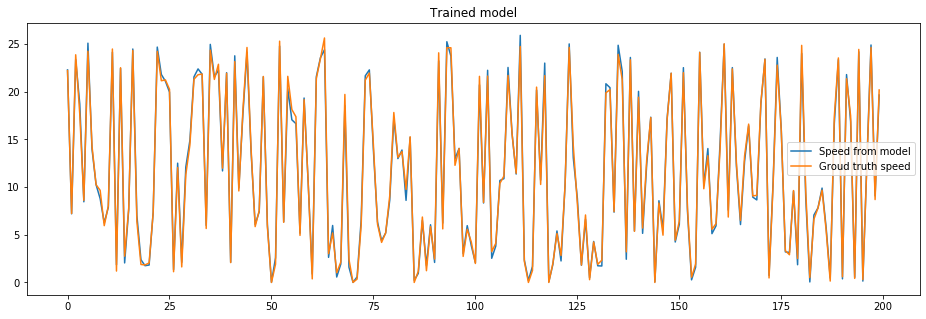

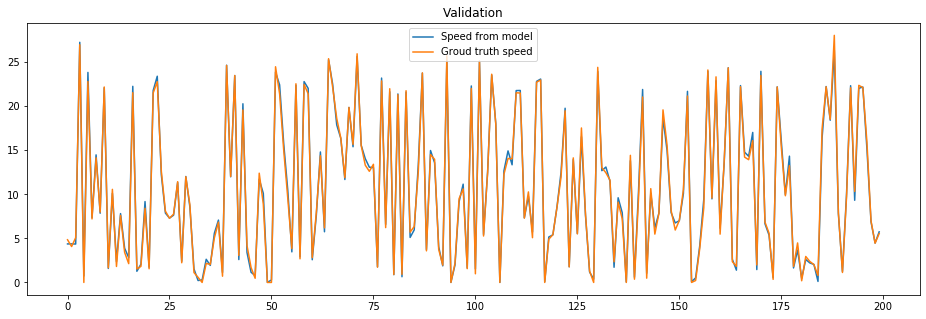

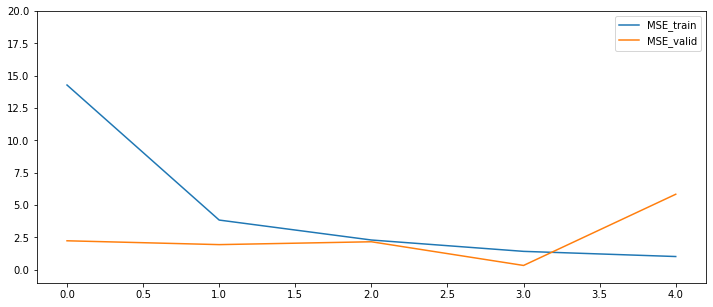

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(speed_train, label='Speed from model')
plt.plot(data_Train[1], label='Groud truth speed')
plt.title('Trained model')
plt.legend()
plt.show()

plt.figure(figsize=(16,5))
plt.plot(speed_test, label='Speed from model')
plt.plot(data_Test[1], label='Groud truth speed')
plt.title('Validation')
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
plt.plot(history.history['loss'], label='MSE_train')
plt.plot(history.history['val_loss'], label='MSE_valid')
plt.ylim(-1,20)
plt.legend()
plt.show()